In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
PERSON = 1
data = pd.read_csv('../data/train.csv', sep=',')

In [3]:

mean = data.loc[data['id'] == PERSON, 'x'].mean()

In [4]:
data = data[data.id == PERSON]

In [5]:
data

,id,time,x,y
0,1,0,800,0
1,1,780,780,0
2,1,1572,792,0
3,1,2392,820,0
4,1,3196,804,0
...,...,...,...,...
1865,1,1395312,640,0
1866,1,1395684,372,0
1867,1,1395756,72,0
1868,1,1396596,840,0


In [6]:
def normalize(data: pd.DataFrame):

    data[['x', 'time']] = data[['x', 'time']].apply(lambda col: (col - col.min()) / (col.max() - col.min()), axis=0)
    return data

In [7]:
#normalize(data)

In [8]:
from sklearn.neighbors import LocalOutlierFactor
def remove_noises(noise_data):
    lof = LocalOutlierFactor(n_neighbors=15, novelty=True)
    lof.fit(noise_data[['x']].to_numpy())
    outlier_predicted = lof.predict(noise_data[['x']].to_numpy())
    clear_data = noise_data[outlier_predicted == 1].copy()

    return clear_data

In [9]:
data = remove_noises(data)

In [10]:
from main_features.rr_features import StatFeatures
from math import ceil


INTERVALS = 20

person_data = data.copy()

min_tresh = person_data.time.min()
max_tresh = person_data.time.max()

dur_interval = ceil((max_tresh - min_tresh) / INTERVALS)

amo_stats = list()
anomalies = list()
amplitude_mode = list()
mode = list()
std_list = list()
mean_list = list()
var_list = list()
p_NN50_list = list()
rmssd_list = list()

for interval in range(INTERVALS):
    bot_tresh = interval * dur_interval
    top_tresh = (interval + 1) * dur_interval
    interval_data = person_data.loc[(person_data.time > bot_tresh) & (person_data.time < top_tresh), 'x']
    if len(interval_data) == 0:
        continue

    stat_info = StatFeatures(interval_data, 5)

    amo_stats.append(stat_info.get_tension_index())
    amplitude_mode.append(stat_info.get_mode_amplitude())
    mode.append(stat_info.get_mode())
    std_list.append(stat_info.get_std())
    mean_list.append(stat_info.get_mean())
    var_list.append(stat_info.get_var())
    p_NN50_list.append(stat_info.get_pNN_50())
    rmssd_list.append(stat_info.get_RMSSD())

    if 1 in person_data.loc[(person_data.time > bot_tresh) & (person_data.time < top_tresh), 'y'].values:
        anomalies.append(1)
    else:
        anomalies.append(0)

amo_stats

Main: 803.4466165413534
Main: 925.1393939393939
Main: 890.144
Main: 728.6779661016949
Next: 752.0
Next: 800.0
Next: 825.0
Main: 721.1090909090909
Main: 770.9853658536585
Main: 692.0967032967034
Main: 678.8327868852458
Next: 675.1142857142858
Main: 733.5333333333333
Main: 709.4153846153846
Main: 712.8484848484849
Next: 726.0315789473684
Main: 759.4212765957448
Main: 746.6341463414634
Main: 695.6190476190476
Main: 697.7127516778523


[37.99587284028121,
 29.756144127989263,
 15.836346343919649,
 127.24383682934112,
 75.94838823711363,
 69.08367414612579,
 61.79378531073447,
 194.11432382159973,
 155.5794704568526,
 166.7569449015342,
 182.31643878825395,
 167.54390277651186,
 105.5474562699865,
 165.9514783708605,
 194.2967658184651,
 87.74965905310825,
 86.57031351968777,
 121.87517678940921,
 98.35994696489308,
 43.43528931056324]

In [11]:
new_data = pd.DataFrame()
new_data['anomaly'] = anomalies
new_data['AM0'] = amo_stats
new_data['mode'] = mode
new_data['amplitude_mode'] = amplitude_mode
new_data['std'] = std_list
new_data['mean'] = mean_list
new_data['var'] = var_list
new_data['p_NN50'] = p_NN50_list
new_data['rmssd'] = rmssd_list

new_data = new_data.loc[~new_data['AM0'].isin([0])]
new_data

,anomaly,AM0,mode,amplitude_mode,std,mean,var,p_NN50,rmssd
0,0,37.995873,803.446617,0.771739,184.206909,703.652174,26.178688,40.659341,229.237820
1,0,29.756144,925.139394,0.883117,181.356867,817.766234,22.177104,27.631579,258.404008
2,0,15.836346,890.144000,0.487179,286.436091,786.769231,36.406621,48.051948,390.931488
3,1,127.243837,728.677966,0.296703,44.437870,759.252747,5.852843,12.222222,33.506218
4,1,75.948388,752.000000,0.977778,84.215584,775.777778,10.855632,5.617978,117.244774
5,0,69.083674,800.000000,0.963855,123.862986,803.903614,15.407691,14.634146,174.677962
6,0,61.793785,825.000000,0.962500,137.790145,831.550000,16.570278,11.392405,163.986415
7,0,194.114324,721.109091,0.425532,34.622889,746.553191,4.637699,0.000000,17.670825
8,1,155.579470,770.985366,0.422222,32.929721,777.644444,4.234547,8.988764,26.856255
9,0,166.756945,692.096703,0.406250,37.408672,714.708333,5.234117,5.263158,28.882338


In [12]:
new_data['color'] = 'g'
new_data.loc[new_data['anomaly'] == 1, 'color'] = 'r'

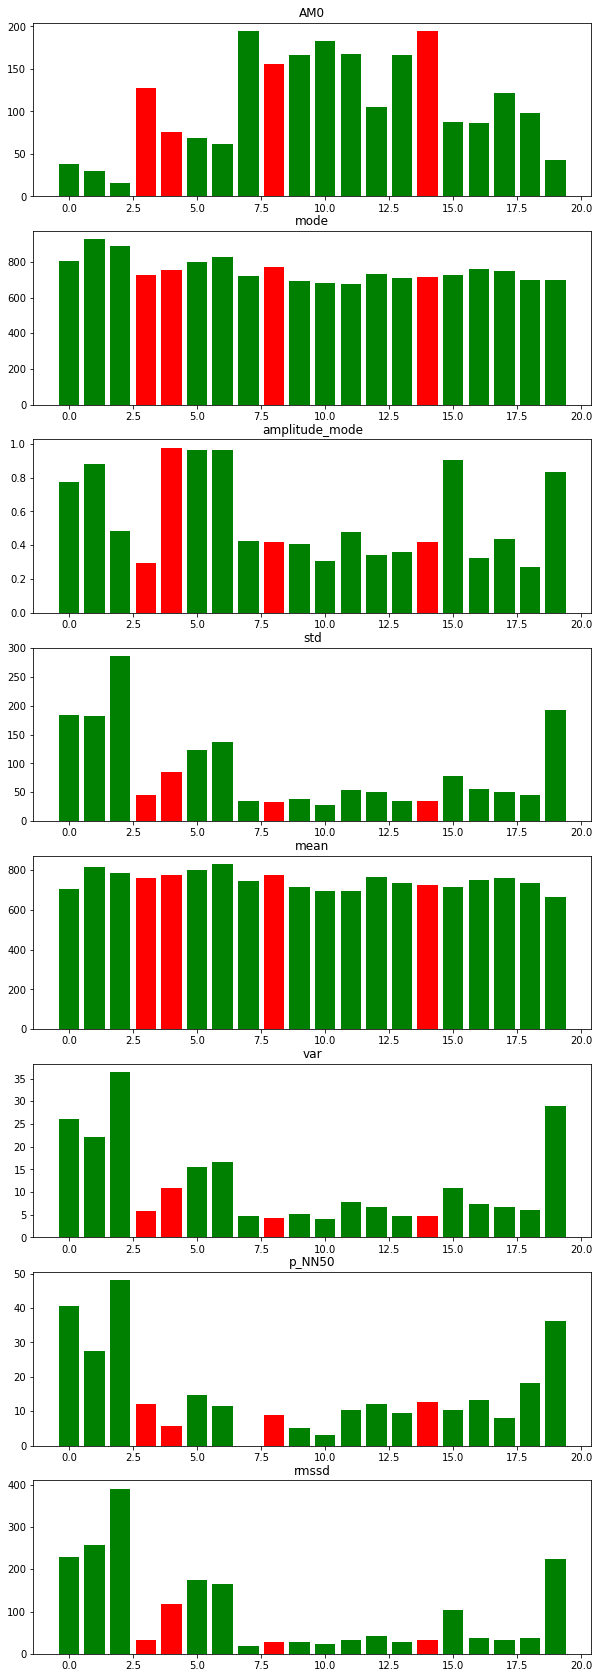

In [13]:
fig, ax = plt.subplots(8)
fig.set_figheight(30)
fig.set_figwidth(10)
i = 0
for column in new_data.columns:
    if column not in ['anomaly', 'color']:
        ax[i].set_title(column)
        ax[i].bar([x for x in range(0, new_data.shape[0])],
                            new_data[column].values,
                            color=new_data['color'].values)

        i += 1

fig.savefig('main_features.png')